### K-Nearest Neighbors Algorithm with Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy.stats.mstats import winsorize

In [2]:
df=pd.read_csv('../appliances-energy.csv')
df.head(3)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


In [3]:
#Due to lot of zero enteries, this column is of not much use and will be ignored in rest of the model.
df.drop(columns='lights',axis=1,inplace=True)

In [4]:
df['date'] = pd.to_datetime(df['date'])
df= df.set_index('date')
df.index.name ='time'
df['date'] = df.index.date
df['day'] = df.index.day
df['month'] = df.index.month
df['hour'] = df.index.hour

In [5]:
df2=pd.concat([df.groupby(['month','day','hour']).Appliances.sum(),
           df.groupby(['month','day','hour']).mean().drop('Appliances',axis=1)],axis=1)
df2.head()

Appliances         T1       RH_1         T2       RH_2  \
month day hour                                                           
1     11  17           330  19.890000  46.502778  19.200000  44.626528   
          18          1060  19.897778  45.879028  19.268889  44.438889   
          19          1040  20.495556  52.805556  19.925556  46.061667   
          20           750  20.961111  48.453333  20.251111  45.632639   
          21           620  21.311667  45.768333  20.587778  44.961111   

                       T3       RH_3         T4       RH_4         T5  ...  \
month day hour                                                         ...   
1     11  17    19.790000  44.897778  18.932778  45.738750  17.166667  ...   
          18    19.770000  44.863333  18.908333  46.066667  17.111111  ...   
          19    20.052222  47.227361  18.969444  47.815556  17.136111  ...   
          20    20.213889  47.268889  19.190833  49.227917  17.615556  ...   
          21    20.373333  46.164444  19.425556  47.918889  18.427222  ...   

                       T9       RH_9     T_out  Press_mm_hg     RH_out  \
month day hour                                                           
1     11  17    17.016667  45.446667  6.308333   733.750000  92.000000   
          18    16.981667  45.290000  5.941667   734.266667  91.583333   
          19    16.902222  45.311389  6.000000   734.791667  89.750000   
          20    16.890000  45.118889  6.000000   735.283333  87.583333   
          21    16.890000  44.807778  5.833333   735.566667  87.416667   

                Windspeed  Visibility  Tdewpoint        rv1        rv2  
month day hour                                                          
1     11  17     6.166667   53.416667   5.050000  26.823044  26.823044  
          18     5.416667   40.000000   4.658333  22.324206  22.324206  
          19     6.000000   40.000000   4.391667  33.734932  33.734932  
          20     6.000000   40.000000   4.016667  25.679642  25.679642  
          21     6.000000   40.000000   3.816667  18.826274  18.826274  

[5 rows x 27 columns]

In [6]:
def f(x):
    x = x +273.15
    return x

In [7]:
dfk=df2.copy()
temp_list=['T1','T2','T3','T4','T6','T5','T7','T8','T9','T_out','Tdewpoint']
for i in temp_list:
    dfk[i] = dfk[i].apply(f)
dfk.head()

Appliances          T1       RH_1          T2       RH_2  \
month day hour                                                             
1     11  17           330  293.040000  46.502778  292.350000  44.626528   
          18          1060  293.047778  45.879028  292.418889  44.438889   
          19          1040  293.645556  52.805556  293.075556  46.061667   
          20           750  294.111111  48.453333  293.401111  45.632639   
          21           620  294.461667  45.768333  293.737778  44.961111   

                        T3       RH_3          T4       RH_4          T5  ...  \
month day hour                                                            ...   
1     11  17    292.940000  44.897778  292.082778  45.738750  290.316667  ...   
          18    292.920000  44.863333  292.058333  46.066667  290.261111  ...   
          19    293.202222  47.227361  292.119444  47.815556  290.286111  ...   
          20    293.363889  47.268889  292.340833  49.227917  290.765556  ...   
          21    293.523333  46.164444  292.575556  47.918889  291.577222  ...   

                        T9       RH_9       T_out  Press_mm_hg     RH_out  \
month day hour                                                              
1     11  17    290.166667  45.446667  279.458333   733.750000  92.000000   
          18    290.131667  45.290000  279.091667   734.266667  91.583333   
          19    290.052222  45.311389  279.150000   734.791667  89.750000   
          20    290.040000  45.118889  279.150000   735.283333  87.583333   
          21    290.040000  44.807778  278.983333   735.566667  87.416667   

                Windspeed  Visibility   Tdewpoint        rv1        rv2  
month day hour                                                           
1     11  17     6.166667   53.416667  278.200000  26.823044  26.823044  
          18     5.416667   40.000000  277.808333  22.324206  22.324206  
          19     6.000000   40.000000  277.541667  33.734932  33.734932  
          20     6.000000   40.000000  277.166667  25.679642  25.679642  
          21     6.000000   40.000000  276.966667  18.826274  18.826274  

[5 rows x 27 columns]

In [8]:
dfkw=pd.DataFrame()
others=['RH_4','RH_6','T7']
for i in others:
    dfkw['w_%s'%i]=dfk[i]

In [9]:
#One by one, we kept winsorization low ratio because it might cause some side effects if we increase that ratio too much.
dfkw['w_Appliances']=winsorize(dfk.Appliances,(0,0.105))
dfkw['w_T1']=winsorize(dfk.T1,(0.05,0.05))
dfkw['w_RH_1']=winsorize(dfk.RH_1,(0.01,0.01))
dfkw['w_T2']=winsorize(dfk.T2,(0,0.04))
dfkw['w_RH_2']=winsorize(dfk.RH_2,(0.01,0.01))
dfkw['w_T3']=winsorize(dfk.T3,(0,0.02))
dfkw['w_T4']=winsorize(dfk.T4,(0.01,0.01))
dfkw['w_T5']=winsorize(dfk.T5,(0,0.01))
dfkw['w_RH_5']=winsorize(dfk.RH_5,(0.001,0.07))
dfkw['w_T6']=winsorize(dfk.T6,(0,0.05))
dfkw['w_RH_7']=winsorize(dfk.RH_7,(0,0.04))
dfkw['w_T_out']=winsorize(dfk.T_out,(0,0.04))
dfkw['w_Press_mm_hg']=winsorize(dfk.Press_mm_hg,(0.012,0))
dfkw['w_RH_out']=winsorize(dfk.RH_out,(0.02,0))
dfkw['w_Windspeed']=winsorize(dfk.Windspeed,(0,0.02))
dfkw['w_Visibility']=winsorize(dfk.Visibility,(0.05,0.125))
dfkw['w_RH_3']=winsorize(dfk.RH_3,(0,0.001))
dfkw['w_T8']=winsorize(dfk.T8,(0.05,0))
dfkw['w_RH_8']=winsorize(dfk.RH_8,(0,0.01))
dfkw['w_T9']=winsorize(dfk.T9,(0,0.001))
dfkw['w_RH_9']=winsorize(dfk.RH_9,(0.001,0.001))
dfkw['w_Tdewpoint']=winsorize(dfk.Tdewpoint,(0,0.001))
dfkw['w_rv1']=winsorize(dfk.rv1,(0.005,0.005))
dfkw['w_rv2']=winsorize(dfk.rv2,(0.005,0.005))

In [10]:
df3=dfkw.copy()
dflog=pd.DataFrame()
for col in df3.columns:
    dflog['log_%s'%col]=np.log(df3[col])

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(dflog)
min_max=scaler.transform(dflog)
scale_df=pd.DataFrame(min_max)
scale_df=scale_df.rename({0:'Appliances'},axis=1)

In [12]:
#Train-test split
from sklearn.model_selection import train_test_split
X = scale_df.drop('Appliances',axis=1)
y = scale_df.Appliances
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 40)

In [13]:
#Lets build model
from sklearn.neighbors import KNeighborsRegressor
Knn = KNeighborsRegressor(n_neighbors=3,weights='distance')
Knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='distance')

In [14]:
# This score of KNN is better than Logistic Regression Model
Knn.score(X_test, y_test)

0.9595896321703982

In [15]:
#Finding optimal k value
k_values=np.arange(1,10)
train_set_scores=np.empty(len(k_values))
test_set_scores=np.empty(len(k_values))

In [16]:
for i,k in enumerate(k_values):
    Knn=KNeighborsRegressor(n_neighbors=k)
    Knn.fit(X_train,y_train)
    train_set_scores[i]=Knn.score(X_train,y_train)
    test_set_scores[i]=Knn.score(X_test,y_test)

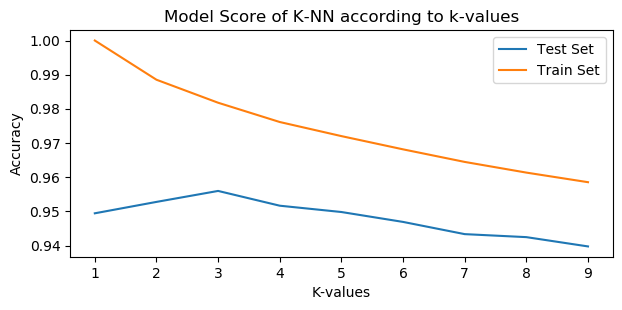

In [17]:
plt.figure(figsize=(7,3), dpi = 100)
plt.plot(k_values, test_set_scores, label = 'Test Set')
plt.plot(k_values, train_set_scores, label = 'Train Set')
plt.legend()
plt.title('Model Score of K-NN according to k-values')
plt.xlabel('K-values')
plt.ylabel('Accuracy')
plt.show()

In [18]:
# Opltimal value of k is 3 neighbors.

### K-Nearest Neighbors Algorithm with Classification

In [19]:
telco=pd.read_csv('../telco_customer_churn.csv')
telco.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [20]:
telco.dropna(inplace=True)
telco=telco.drop(['customerID'],axis=1)
target=['Churn']
categorical=telco.select_dtypes(include='object').columns.tolist()
categorical=[x for x in categorical if x not in target]
numeric=telco.dtypes[telco.dtypes!=object].keys().tolist()

In [21]:
telco.Churn=telco.Churn.replace({"Yes":1, "No":0})
telco2=pd.concat([telco,pd.get_dummies(telco[categorical])],axis=1).drop(telco[categorical],axis=1)

In [22]:
X=telco2.drop('Churn',axis=1)
y=telco2.Churn

Generally, most of the datasets have very different scales and contain some very large outliers. These two characteristics lead to difficulties to visualize the data and, more importantly, they can degrade the predictive performance of many machine learning algorithms

In [23]:
from sklearn.preprocessing import StandardScaler
#Instantiate the scaler
scaler=StandardScaler()
Xsc=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(Xsc,y,test_size=0.20, random_state=40, stratify = y)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [31]:
test_preds=clf.predict(X_test)

In [32]:
clf.score(X_test,y_test)

0.7366926898509581

In [33]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score
def metrics(x,y):
    print("Precision Score: {}".format(precision_score(x,y)))
    print('Recall Score: {}'.format(recall_score(x,y)))
    print("Accuracy Score: {}".format(accuracy_score(x,y)))
    print("F1 Score: {}".format(f1_score(x,y)))
    print("AUC Score: {}".format(roc_auc_score(x,y)))
metrics(y_test,test_preds)

Precision Score: 0.56
Recall Score: 0.0374331550802139
Accuracy Score: 0.7366926898509581
F1 Score: 0.07017543859649121
AUC Score: 0.5134025678782711


If the metrics / model performance are not satisfying we can try to find optimum k-neighbors.

In [28]:
from sklearn import metrics
k_range=range(1,7)
scores__list=[]
for k in k_range:
    clf=KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train,y_train)
    test_preds=clf.predict(X_test)
    scores__list.append(metrics.accuracy_score(y_test,test_preds))

Text(0, 0.5, 'Testing Accuracy')

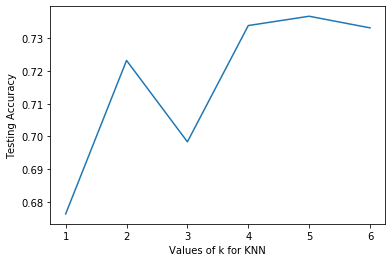

In [29]:
# Plot the relationship between k and the testing accuracy
plt.plot(k_range,scores__list)
plt.xlabel('Values of k for KNN')
plt.ylabel('Testing Accuracy')

In [34]:
# 5 neighbors have the biggest test accuracy value for KNN.